# Tarea Semana 09
## Potencial eléctrico y campo eléctrico
### Realizado por Javier Fernández y Kaled Sequeira

- Realice las actividades que se le indican en los espacios disponibles. 
- Debe entregar una copia de este cuaderno en el espacio habilitado el tecDigital para el trabajo en clase TS09.
- Puede agregar celdas de texto o código si lo considera necesario.
- Use nombres descriptivos para las variables y las funciones que defina. 
- Agregue todos los comentarios que considere necesarios para mejorar la comprensión del código.
- **Valor total XX puntos**.
- Fecha de entrega: **Viernes 21 de abril, 11.59 pm**.

## Cálculo de campo eléctrico

Una vez que se conoce el potencial eléctrico en una región, se puede obtener las componentes del campo eléctrico como

$$
E_x = -\frac{\partial V}{\partial x}    
$$

para cada eje. Donde el campo eléctrico $\vec E$
se expresa como

$$
\vec E = E_x\hat\imath + E_y \hat\jmath + E_z\hat k
$$

Se puede aplicar el método de diferencias finitas para estimar las componentes del campo, por ejemplo:

$$
E_x(i,j) \approx -\frac{V(i+1,j)-V(i-1,j)}{2\Delta x}
$$

## 1. Campo en un capacitor de placas paralelas

Se desea calcular el comportamiento del potencial eléctrico y el campo electrico alrededor de un capacitor de placas paralelas como se muestra en la figura

<div>
<img src="attachment:Screenshot%20from%202023-04-14%2001-02-48.png" width="300"/>
</div>

1. Considere la geometría de un capacitor de placas paralelas. Defina una malla centrada en el origen de $L = 2$. Todo el borde de la malla está a $V = 0$. 
2. Las placas paralelas están ubicadas en $x = \pm 0.3$ y tienen una extensión $L_P = 0.75$. La placa izquierda tiene potencial $V = +1$ mientras que la placa derecha $V = -1$.

In [ ]:
# Geometría del sistema
import numpy as np

# Definir tamaño de la malla
L = 2
N = 200
x = np.linspace(-L/2, L/2, N)
y = np.linspace(-L/2, L/2, N)

# Definir distancia de paso
dx = x[1] - x[0]
dy = y[1] - y[0]

# Definir potencial en las placas y en el borde de la malla
V_placa1 = 1
V_placa2 = -1
V_borde = 0

# Definir la ubicación y extensión de las placas
LP = 0.75
x1 = int(N/2 - LP/dx/2)
x2 = int(N/2 + LP/dx/2)

# Inicializar matriz del potencial
V = np.zeros((N, N))

# Establecer condiciones de borde
V[0,:] = V_borde
V[-1,:] = V_borde
V[:,0] = V_borde
V[:,-1] = V_borde
V[x1:x2, int(N/2 - 0.15/dy)] = V_placa1 
V[x1:x2, int(N/2 + 0.15/dy)] = V_placa2
  

3. Ahora resuelva numéricamente la ecuación de Laplace usando diferencias finitas en la geometría descrita. Aplique el método de método de relajación de Jacobi para obtener el potencial eléctrico en la malla establecida.
4. Aplique un criterio de convergencia para determinar el número adecuado de iteraciones para que el sistema alcance el equilibrio. Compare los valores de potencial en la malla en las últimas dos iteraciones (para un número arbitrario de iteraciones): si los valores difieren poco considere que el sistema alcanzó el equilibrio, si la diferencia es significativa, haga más iteraciones en el proceso de relajación. Explique su razonamiento.

In [ ]:
# Cálculo de V(i,j)
# Método de diferencias finitas y relajación
def diferencias_finitas(V_inicial, nIteraciones, tolerancia):
    # Tamaño de la malla
    nPuntos = V_inicial.shape[0]
    
    # Crear matriz para la iteración actual
    V_actual = V_inicial.copy()
    
    # Realizar nIteraciones iteraciones
    for k in range(nIteraciones):
        # Actualizar cada entrada de la matriz
        for i in range(1, nPuntos-1):
            for j in range(1, nPuntos-1):
                #Calcula el promedio de los vecinos más cercanos 
                V_actual[i, j] = 0.25 * (V_actual[i-1, j] + V_actual[i+1, j] + V_actual[i, j-1] + V_actual[i, j+1]) 
        
        # Verificar convergencia
        if k > 0:
            diferencia = np.max(np.abs(V_actual - V_anterior))
            if diferencia < tolerancia:
                break
        
        # Almacenar la matriz de la iteración anterior
        V_anterior = V_actual.copy()
    
    # Retornar la matriz de la iteración final
    return V_actual


5. Grafique los resultados obtenidos. Primero grafique las líneas de contorno usando la función `contourf()`. Use un mapa de colores adecuado y agrege un `colorbar` a la figura.

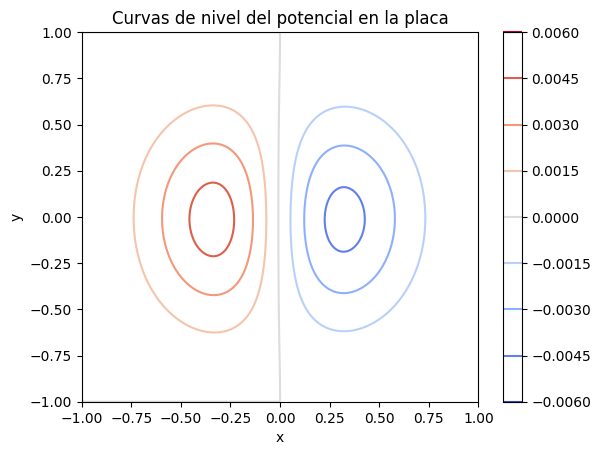

In [ ]:
# Potencial eléctrico 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Obtener la matriz de valores de potencial calculados
nIteraciones = 1000
tolerancia = 0.000001
potencial = diferencias_finitas(V, nIteraciones,tolerancia) 
#Se evalua la función definida anteriormente, con las condiciones iniciales y el número de iteraciones dado
# Graficar las curvas de nivel en 2D que representa el potencial en la placa
plt.figure()
contour = plt.contour(x, y, potencial, cmap='coolwarm')
plt.colorbar(contour)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curvas de nivel del potencial en la placa')
plt.show()

6. Use la función `plot_surface()` para generar una superficie en 3D que represente el potencial en la placa.

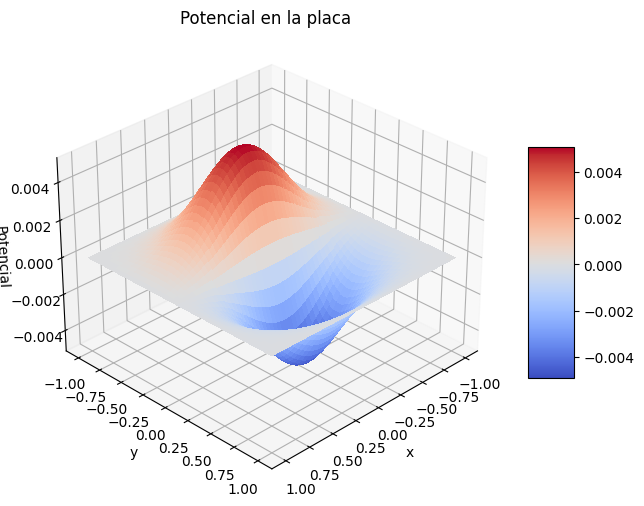

In [ ]:
# Potencial eléctrico 

# Graficar la superficie del potencial en la placa
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Crear una malla para graficar la superficie en 3D
X, Y = np.meshgrid(x, y)

# Graficar la superficie
surf = ax.plot_surface(X, Y, potencial.T, cmap='coolwarm', linewidth=0, antialiased=False)

# Agregar una barra de color
fig.colorbar(surf, shrink=0.5, aspect=5)

# Agregar etiquetas de los ejes y título
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Potencial')
ax.set_title('Potencial en la placa')
ax.view_init(30, 45)
plt.show()


7. Ahora obtenga el campo eléctrico en la malla $\vec E(i,j)$ a partir de $V(i,j)$

In [ ]:
# Campo eléctrico
# Calcular el campo eléctrico a partir del potencial
Ex = np.zeros((N, N))
Ey = np.zeros((N, N))

# Realizar nIteraciones iteraciones
for k in range(nIteraciones):
   
    # Actualizar cada entrada de las matrices
    for i in range(1, N-1):
        for j in range(1, N-1):
            Ey[i,j] = -(potencial[i,j+1] - potencial[i,j-1])/(2*dy)
            Ex[i,j] = -(potencial[i+1,j] - potencial[i-1,j])/(2*dx)

8. Grafique el campo eléctrico como un campo vectorial usando la función `quiver()`. Lea la documentación de `quiver()` para detalles sobre los parámetros de entrada y la salida de la función.

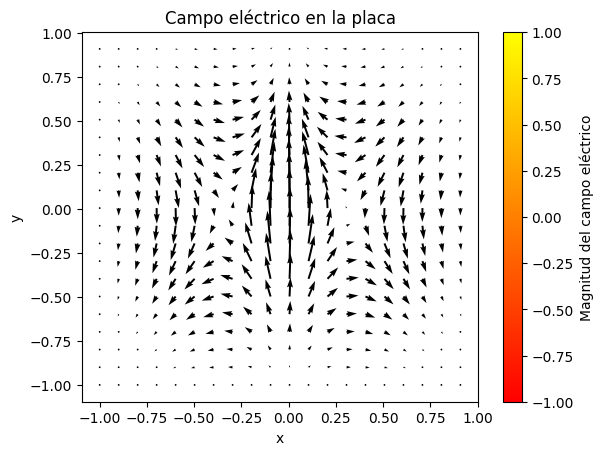

In [ ]:
# Campo eléctrico
# Graficar potencial eléctrico y campo eléctrico
# Paso de separación para las flechas del campo eléctrico
step = 10

fig, ax = plt.subplots()
Q = ax.quiver(X[::step, ::step], Y[::step, ::step], Ex[::step, ::step], Ey[::step, ::step], 
          scale=0.25, pivot="tail", width=0.005, cmap='autumn')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Campo eléctrico en la placa')
# ajustar la escala de colores
Q.set_clim(-1, 1)
# agregar barra de color
cbar = fig.colorbar(Q)
cbar.set_label('Magnitud del campo eléctrico')
plt.show()


## 2. Campo en una región con carga

Para una región tridimensional que contiene carga eléctrica, el potencial eléctrico obedece la ecuación de Poisson:

$$
\frac{\partial^2 V}{\partial x^2} + \frac{\partial^2 V}{\partial y^2} + \frac{\partial^2 V}{\partial z^2} = -\frac{\rho}{\epsilon_0} 
$$

Aplicando la discretización del espacio y el método de diferencias finitas, el potencial en la placa se aproxima como

$$
V(i,j,k) = \frac{1}{6}\Bigl [ V(i+1,j,k)+V(i-1,j,k)+V(i,j+1,k)+V(i,j-1,k)+V(i,j,k+1)+V(i,j,k-1)\Bigr] + \frac{\Delta x^2}{6}\rho(i,j,k)
$$

Donde se asume que $\Delta x = \Delta y = \Delta z$

Se desea calcular el comportamiento del potencial eléctrico y el campo electrico alrededor de un capacitor de placas paralelas como se muestra en la figura


1. Considere la geometría de una caja cuadrada. Defina una malla tridimensional centrada en el origen de $L = 2$. Todas las paredes de la caja están a $V = 0$. 
2. Se va a considerar que hay una carga _puntual_ en el centro de la caja, la densidad de carga es entonces: $\rho(0,0,0)= \frac{q}{\mathrm d x^3}$. Donde $\mathrm d x$ es un valor pequeño comparado con $\Delta x$. Por lo tanto, note que la carga no es estrictamente una carga puntual, sino que ocupa un pequeño volumen en el espacio.

In [ ]:
# Geometría del sistema

# Definir tamaño de la caja
L = 2
N = 200
x = np.linspace(-L/2, L/2, N)
y = np.linspace(-L/2, L/2, N)
z = np.linspace(-L/2, L/2, N)

# Definir distancia de paso
dx = x[1] - x[0]

# Definir potencial en el borde de la caja y el centro
dens_centro = 1

# Definir la ubicación y extensión del centro
x0 = int(N/2 - 1)
x1 = int(N/2 + 1)
y0 = int(N/2 - 1)
y1 = int(N/2 + 1)
z0 = int(N/2 - 1)
z1 = int(N/2 + 1)

# Inicializar matriz del potencial y de densidad de carga
V = np.zeros((N, N, N))
dens = np.zeros((N, N, N))

# Establecer condiciones de centro de
dens[x0:x1,y0:y1,z0:z1] = dens_centro / ( dx**3 )



3. Ahora resuelva numéricamente la ecuación de poisson usando diferencias finitas en la geometría descrita. Aplique el método de método de relajación de Jacobi para obtener el potencial eléctrico en la malla establecida.
4. Aplique un criterio de convergencia para determinar el número adecuado de iteraciones para que el sistema alcance el equilibrio. Compare los valores de potencial en la malla (en z = 0) en las últimas dos iteraciones (para un número arbitrario de iteraciones): si los valores difieren poco considere que el sistema alcanzó el equilibrio, si la diferencia es significativa, haga más iteraciones en el proceso de relajación. Explique su razonamiento.

In [ ]:
# Cálculo de V(i,j,k)
def diferencias_finitas3D(V_inicial, dens, dx, nIteraciones, tolerancia): #Función que tome como valores de entrada la matriz de valores iniciales y el número de iteraciones
    # Tamaño de la malla
    nPuntos = V_inicial.shape[0]
    
    # Crear matriz para la iteración actual
    V_actual = V_inicial.copy()
    V_anterior = V_inicial.copy()
    
    # Realizar nIteraciones iteraciones
    for n in range(nIteraciones):
        
        print("iteración no.",n+1)  #Control para saber cuántas iteraciones lleva, porque el código es muy lento.

        # Actualizar cada entrada de la matriz
        for i in range(1, nPuntos-1): #Recorre saltandose la primera y última fila
            for j in range(1, nPuntos-1):
                for k in range(1, nPuntos-1):
                    
                    #Calcula el promedio de los vecinos más cercanos 
                    V_actual[i, j, k] = (dens[i,j,k] * dx ** 2 ) / 6  + 1/6 * (V_actual[i-1, j,k] + V_actual[i+1, j,k] + V_actual[i, j-1,k] + V_actual[i, j+1,k] + V_actual[i, j,k-1] +  V_actual[i, j, k+1]) 
            
        
        # Verificar convergencia
        if k > 0:
            diferencia = np.max(np.abs(V_actual - V_anterior))
            if diferencia < tolerancia:
                break
        
        # Almacenar la matriz de la iteración anterior
        V_anterior = V_actual.copy()
    # Retornar la matriz de la iteración final
    return V_actual

5. Grafique los resultados obtenidos. Primero grafique las líneas de contorno usando la función `contourf()`. Use un mapa de colores adecuado y agrege un `colorbar` a la figura. Grafique únicamente el comportamiento en el plano $z=0$.

In [ ]:
# Potencial eléctrico 

# Obtener la matriz de valores de potencial calculados
nIteraciones = 10
tolerancia = 0.001
potencial3D = diferencias_finitas3D(V, dens, dx, nIteraciones, tolerancia) 



iteración no. 1
iteración no. 2
iteración no. 3
iteración no. 4
iteración no. 5
iteración no. 6
iteración no. 7
iteración no. 8
iteración no. 9
iteración no. 10


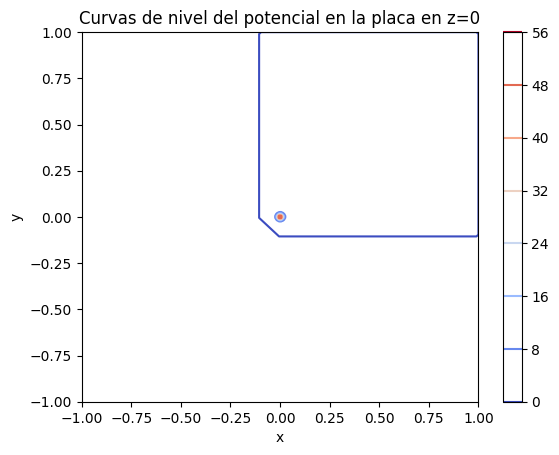

In [ ]:
#Se evalua la función definida anteriormente, con las condiciones iniciales y el número de iteraciones dado
# Graficar las curvas de nivel en 2D que representa el potencial en la placa
plt.figure()
contour = plt.contour(x, y, potencial3D[:,:,z0], cmap='coolwarm')
plt.colorbar(contour)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curvas de nivel del potencial en la placa en z=0')
plt.show()

Como no se observa suficientemente bien, se toma un acercamiento de -0.2 a 0.2 para x y para y; tal como lo hace el Giordano


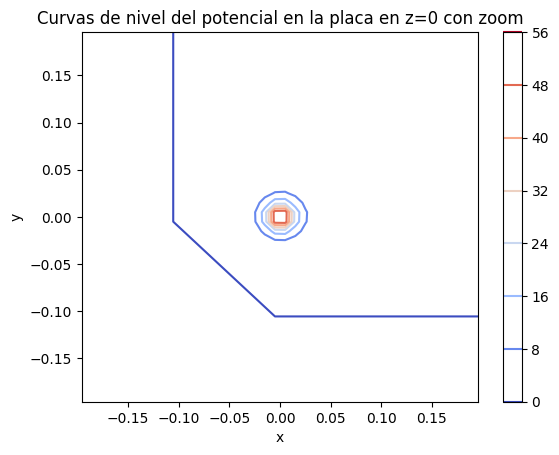

In [ ]:
plt.figure()
contour = plt.contour(x[80:120], y[80:120], potencial3D[80:120,80:120,z0], cmap='coolwarm')
plt.colorbar(contour)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curvas de nivel del potencial en la placa en z=0 con zoom')
plt.show()

6. Use la función `plot_surface()` para generar una superficie en 3D que represente el potencial en la placa.  Grafique únicamente el comportamiento en el plano $z = 0$.

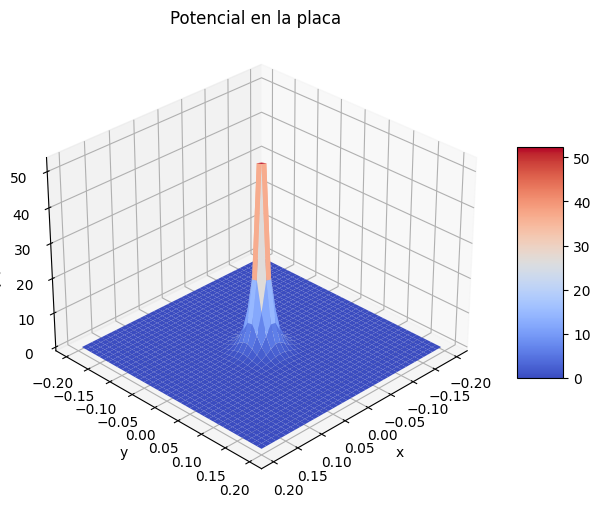

In [ ]:
# Potencial eléctrico

# De un sólo se aplica el zoom para ver mejor el comportamiento dado

# Graficar la superficie del potencial en la placa
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Crear una malla para graficar la superficie en 3D
X, Y = np.meshgrid(x[80:120], y[80:120])

# Graficar la superficie
surf = ax.plot_surface(X, Y, potencial3D[80:120,80:120,z0], cmap='coolwarm', linewidth=0)

# Agregar una barra de color
fig.colorbar(surf, shrink=0.5, aspect=5)

# Agregar etiquetas de los ejes y título
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Potencial')
ax.set_title('Potencial en la placa')
ax.view_init(30, 45)
plt.show()

7. Ahora obtenga el campo eléctrico en la malla tridimensional $\vec E(i,j,k)$ a partir de $V(i,j,k)$

In [ ]:
# Campo eléctrico
# Calcular el campo eléctrico a partir del potencial
Ex = np.zeros((N, N, N))
Ey = np.zeros((N, N, N))
Ez = np.zeros((N, N, N))

# Realizar nIteraciones iteraciones
for k in range(nIteraciones):
   
    # Actualizar cada entrada de las matrices
    for i in range(1, N-1):
        for j in range(1, N-1):
            for k in range(1, N-1):
                Ex[i,j,k] = -(potencial3D[i+1,j,k] - potencial3D[i-1,j,k])/(2*dx)
                Ey[i,j,k] = -(potencial3D[i,j+1,k] - potencial3D[i,j-1,k])/(2*dx)
                Ez[i,j,k] = -(potencial3D[i,j,k+1] - potencial3D[i-1,j,k-1])/(2*dx)

8. Grafique el campo eléctrico como un campo vectorial usando la función `quiver()`. Lea la documentación de `quiver()` para detalles sobre los parámetros de entrada y la salida de la función. Grafique únicamente el comportamiento en el plano $z = 0$.

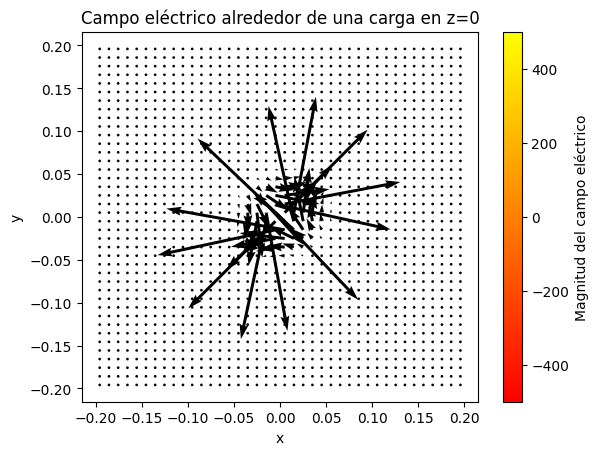

In [ ]:
# Campo eléctrico
# Graficar potencial eléctrico y campo eléctrico
# Paso de separación para las flechas del campo eléctrico
step = 1

X, Y = np.meshgrid(x[80:120], y[80:120])


fig, ax = plt.subplots()
Q = ax.quiver(X[::step, ::step], Y[::step, ::step], Ex[80:120:step, 80:120:step,z0], Ey[80:120:step, 80:120:step,z0], 
          scale=7500, pivot='tail', width=0.0075, cmap='autumn')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Campo eléctrico alrededor de una carga en z=0')
# ajustar la escala de colores
Q.set_clim(-500, 500)
# agregar barra de color
cbar = fig.colorbar(Q)
cbar.set_label('Magnitud del campo eléctrico')
plt.show()
plt.show()

## Referencias

* Giordano, N.; Nakanishi, H. (2006). _Computational Physics, 2ª ed_. Estados Unidos: Pearson Education